In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Import and Initial Exploration

In this step, data is loaded and a quick preview of the first rows is performed to understand the structure of the data

In [2]:
# import dataset and see first 5 rows of dataframe

df = pd.read_excel('1BadlyStructuredSalesData12-220823-192255.xlsx', sheet_name='Dirty 1', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Segment>>,Consumer,NaN,NaN,NaN,Consumer Total,Corporate,NaN,NaN,NaN,Corporate Total,Home Office,NaN,NaN,NaN,Home Office Total
1,Ship Mode>>,First Class,Same Day,Second Class,Standard Class,NaN,First Class,Same Day,Second Class,Standard Class,NaN,First Class,Same Day,Second Class,Standard Class,NaN
2,Order ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CA-2011-100293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056,91.056
4,CA-2011-100706,NaN,NaN,129.44,NaN,129.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data Cleaning & Transformation

From the top 5 rows, it is evident that the dataframe doesn't have correct column names 

and we need to get these column names from the first three rows.

From the fourth row, the dataframe has data.

So first, subset the dataframe by exclusing the first three rows.

In [3]:
# Removing irrelevant rows from the dataset.

df = df.iloc[3:]

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
3,CA-2011-100293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056,91.056
4,CA-2011-100706,NaN,NaN,129.44,NaN,129.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CA-2011-100895,NaN,NaN,NaN,605.47,605.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CA-2011-100916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788.86,788.86,NaN,NaN,NaN,NaN,NaN
7,CA-2011-101266,NaN,NaN,13.36,NaN,13.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now need to provide proper column names 

In [4]:
# Renaming and assigning meaningful column names.
header = ['OrderId','Consumer:FirstClass','Consumer:Sameday','Consumer:Secondclass','Consumer:StandardClass','Consumer:Total',
         'Corporate :FirstClass','Corporate :Sameday','Corporate :Secondclass','Corporate :StandardClass','Corporate :Total',
         'HomeOffice:FirstClass','HomeOffice:Sameday','HomeOffice:Secondclass','HomeOffice:StandardClass','HomeOffice:Total',
         ]

df.columns = header

df.head()

,OrderId,Consumer:FirstClass,Consumer:Sameday,Consumer:Secondclass,Consumer:StandardClass,Consumer:Total,Corporate :FirstClass,Corporate :Sameday,Corporate :Secondclass,Corporate :StandardClass,Corporate :Total,HomeOffice:FirstClass,HomeOffice:Sameday,HomeOffice:Secondclass,HomeOffice:StandardClass,HomeOffice:Total
3,CA-2011-100293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056,91.056
4,CA-2011-100706,NaN,NaN,129.44,NaN,129.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CA-2011-100895,NaN,NaN,NaN,605.47,605.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CA-2011-100916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788.86,788.86,NaN,NaN,NaN,NaN,NaN
7,CA-2011-101266,NaN,NaN,13.36,NaN,13.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above data looks pivoted (wide -- hard to read) with so many columns and null values.

It can be avoided by doing unpivoting (long -- easy to read) the data by categorizing the Segment and ShipMode properly. 

After that null values needs be avoided.

In [5]:
# Reshaping the data from wide format to long format.
df_long = pd.melt(df,id_vars=['OrderId'])

df_long.head()

,OrderId,variable,value
0,CA-2011-100293,Consumer:FirstClass,NaN
1,CA-2011-100706,Consumer:FirstClass,NaN
2,CA-2011-100895,Consumer:FirstClass,NaN
3,CA-2011-100916,Consumer:FirstClass,NaN
4,CA-2011-101266,Consumer:FirstClass,NaN


Now will check for dimenssion of the dataframe and missing values

In [6]:
df_long.shape

(12345, 3)

In [7]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12345 entries, 0 to 12344
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OrderId   12345 non-null  object
 1   variable  12345 non-null  object
 2   value     1659 non-null   object
dtypes: object(3)
memory usage: 289.5+ KB


In [8]:
# Finding missing values by field wise.
df_long.isnull().sum()

OrderId         0
variable        0
value       10686
dtype: int64

In [9]:
# Dropping missing values 
df_long.dropna(inplace=True)

df_long.head()

,OrderId,variable,value
11,CA-2011-103366,Consumer:FirstClass,149.95
20,CA-2011-109043,Consumer:FirstClass,243.6
29,CA-2011-113166,Consumer:FirstClass,9.568
51,CA-2011-124023,Consumer:FirstClass,8.96
63,CA-2011-130155,Consumer:FirstClass,34.2


In [10]:
#  Ensuring dropping null values was successful.
df_long.isnull().sum()

OrderId     0
variable    0
value       0
dtype: int64

From the above data, the "variable" column is still the combination of "Segment" and "ShipMode".

These two categories separated as follows to have meaningful fields.



In [11]:

# Splitting the variable column into meaningful components like "Segment" and "ShipMode".

df_long[['Segment','ShipMode']] = df_long['variable'].str.split(':',expand=True)

filt = (df_long['ShipMode']!='Total') & (df_long['OrderId']!='Grand Total')
df = df_long[filt][['OrderId','Segment','ShipMode','value']]



df.head()

,OrderId,Segment,ShipMode,value
11,CA-2011-103366,Consumer,FirstClass,149.95
20,CA-2011-109043,Consumer,FirstClass,243.6
29,CA-2011-113166,Consumer,FirstClass,9.568
51,CA-2011-124023,Consumer,FirstClass,8.96
63,CA-2011-130155,Consumer,FirstClass,34.2


In [12]:
# Checking newly updated dataframe column names
df.columns

Index(['OrderId', 'Segment', 'ShipMode', 'value'], dtype='object')

In [13]:
# Checking newly updated dataframe data types
df.dtypes

OrderId     object
Segment     object
ShipMode    object
value       object
dtype: object

1. Renaming the "value" filed to "Total"



2. Converting the "Total" column to ineger type



In [14]:
# Renaming and transforming data types for consistency.

df.rename(columns={'value':'Total'}, inplace=True)

df['Total'] = df['Total'].astype(float)

In [15]:
df.head()

,OrderId,Segment,ShipMode,Total
11,CA-2011-103366,Consumer,FirstClass,149.950
20,CA-2011-109043,Consumer,FirstClass,243.600
29,CA-2011-113166,Consumer,FirstClass,9.568
51,CA-2011-124023,Consumer,FirstClass,8.960
63,CA-2011-130155,Consumer,FirstClass,34.200


The OrderId field is the combination of "Country" and "Year".

Extracting 'Year' and 'Country' from the OrderId creates new features that make the data more useful for analysis.

These features can help in grouping, filtering, or identifying trends in the dataset.

In [18]:
# adding new features Year and Country from OrderId
df['Year'] = df['OrderId'].str[3:7]

df['Country'] = df['OrderId'].str[0:2]

df.head()

,OrderId,Segment,ShipMode,Total,Year,Country
11,CA-2011-103366,Consumer,FirstClass,149.950,2011,CA
20,CA-2011-109043,Consumer,FirstClass,243.600,2011,CA
29,CA-2011-113166,Consumer,FirstClass,9.568,2011,CA
51,CA-2011-124023,Consumer,FirstClass,8.960,2011,CA
63,CA-2011-130155,Consumer,FirstClass,34.200,2011,CA


In [19]:
df['Country'].unique()

array(['CA', 'US'], dtype=object)

# 3. Univariate Analysis, outlier detection and distribution visualization

In [20]:
# statistical summary (mean, min, max, quartiles) of the Total column.

df['Total'].describe()

count      822.00000
mean       476.54733
std       1144.58992
min          1.16700
25%         34.54050
50%        159.97500
75%        536.11000
max      23661.22800
Name: Total, dtype: float64

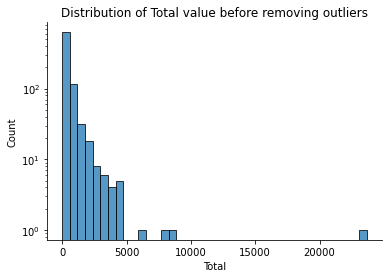

In [21]:
# Visualizes the distribution of the Total variable using a histogram.

ax = sns.histplot(x='Total', data=df, bins=40)
ax.set_yscale('log')

ax.set_title('Distribution of Total value before removing outliers');

sns.despine()

In [22]:
# outliers detection using 3-Sigma Rule

# 1. Calculating the mean and standard deviation of Total

mean_total = df['Total'].mean()
std_total = df['Total'].std()

# 2. Computing lower and upper bounds with mean ± 3 * std to detect outliers.
lower_bound = mean_total - (3 * std_total)
upper_bound = mean_total + (3 * std_total)

# 3. Filtering and marking outliers with df_transactions['isOutlier']

filt = (df['Total'] < lower_bound ) | (df['Total'] > upper_bound)

outliers = df[filt]

df['isOutlier'] = (df['Total'] < lower_bound ) | (df['Total'] > upper_bound)

df.head()

,OrderId,Segment,ShipMode,Total,Year,Country,isOutlier
11,CA-2011-103366,Consumer,FirstClass,149.950,2011,CA,False
20,CA-2011-109043,Consumer,FirstClass,243.600,2011,CA,False
29,CA-2011-113166,Consumer,FirstClass,9.568,2011,CA,False
51,CA-2011-124023,Consumer,FirstClass,8.960,2011,CA,False
63,CA-2011-130155,Consumer,FirstClass,34.200,2011,CA,False


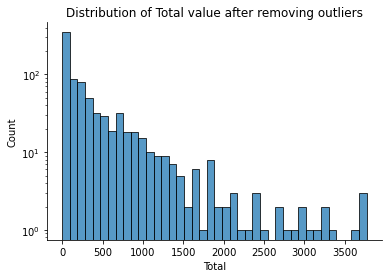

In [23]:
#  Distribution of Total after outlier removal
ax = sns.histplot(df[df['isOutlier']==False]['Total'],bins=40);

ax.set_yscale('log')
ax.set_title('Distribution of Total value after removing outliers');

sns.despine()

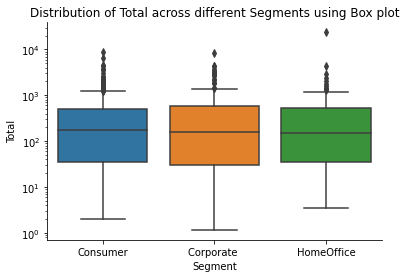

In [24]:
# outlier detection using Boxplot(IQR Method) : Q3 + 1.5 * IQR and Q1 - 1.5 * IQR

ax = sns.boxplot(x='Segment',y='Total', data=df );

ax.set_yscale('log')

sns.despine()

ax.set_title('Distribution of Total across different Segments using Box plot', loc='center');


In [25]:
# 1. Calculating the Interquartile Range (IQR) for the Total column.

Q1,Q2,Q3 = np.quantile(df['Total'],[0.25,0.50,0.75])

IQR = Q3 - Q1

# 2. Computing outlier bounds with Q1 - 1.5*IQR and Q3 + 1.5*IQR
lower_bound_iqr = Q1 - (1.5 * IQR)
upper_bound_iqr = Q3 + (1.5 * IQR)

# 3. Filtering and marking outliers with df_transactions['isOutlier_IQR']

filt = (df['Total'] < lower_bound_iqr) | (df['Total'] > upper_bound_iqr)
df['isOutlier_IQR'] = filt

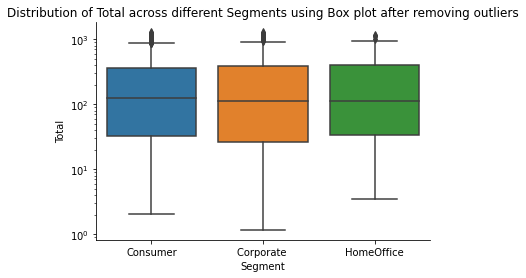

In [26]:
# after removing outliers)

ax = sns.boxplot(x='Segment',y='Total', data=df[df['isOutlier_IQR']==False] );

ax.set_title('Distribution of Total across different Segments using Box plot after removing outliers');

ax.set_yscale('log')

sns.despine()

3-Sigma Rule: Detected 1.09% outliers, best for normal distributions.

IQR Method: Detected 8.52% outliers, better for skewed distributions.

The IQR Method is generally more effective at identifying a broader range of anomalies.

In [28]:
print('No of Outliers detected using 3S Rule:',round(len(df[df['isOutlier']==True])/len(df)*100,2), '%')
print('No of Outliers detected using IQR Method:',round(len(df[df['isOutlier_IQR']==True])/len(df)*100,2),'%')

No of Outliers detected using 3S Rule: 1.09 %
No of Outliers detected using IQR Method: 8.52 %


In [30]:
df[df['isOutlier']==False].describe()

,Total
count,813.000000
mean,397.101303
std,601.150270
min,1.167000
25%,34.340000
50%,155.456000
75%,519.680000
max,3769.560000


# 4. Data Visualization



In [31]:
# Before visualizing data, will first focus on distribution of categorical varaibles like Segment and ShipMode

df['Segment'].value_counts(normalize=True)

Consumer      0.540146
Corporate     0.300487
HomeOffice    0.159367
Name: Segment, dtype: float64

In [32]:
df['ShipMode'].value_counts(normalize=True)

StandardClass    0.602190
Secondclass      0.199513
FirstClass       0.150852
Sameday          0.047445
Name: ShipMode, dtype: float64

Below Charts represents the "count" and ""bar" chart respectively, 

which shows the number of transactions in each Segment by ShipMode and total sum of transactions.

From these charts, it is evident that all the ShipModes has highest Consumer Segment compared to 

other segments and HomeOffice as the lowest.

"HomeOffice" Segment has fewer number of transactions and total sum in "SameDay" shipping mode 

indicates that they might prefer more affordable options like "StandardClass".


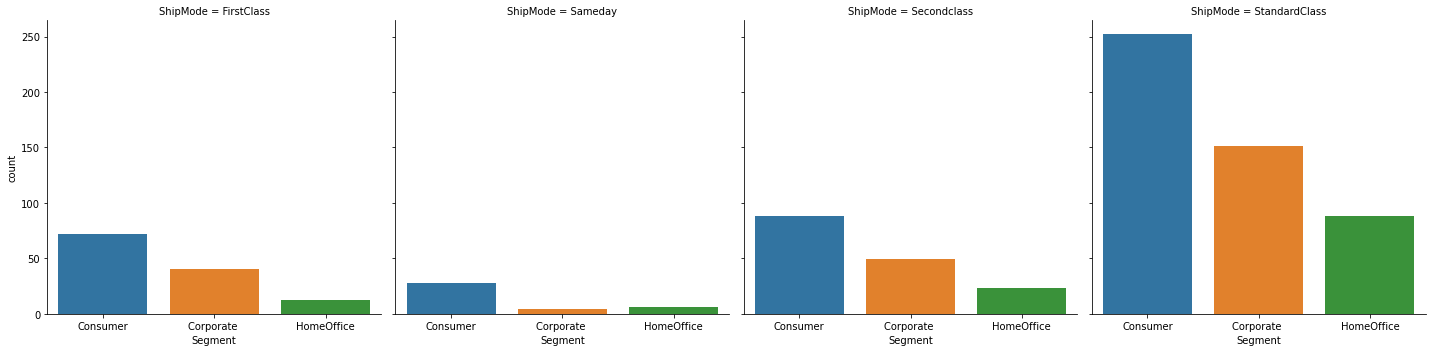

In [33]:
# visualizes the count of segments grouped by ShipMode.

sns.catplot(x='Segment',data=df[df['isOutlier']==False],
           kind='count', col='ShipMode',ci=None           
           );

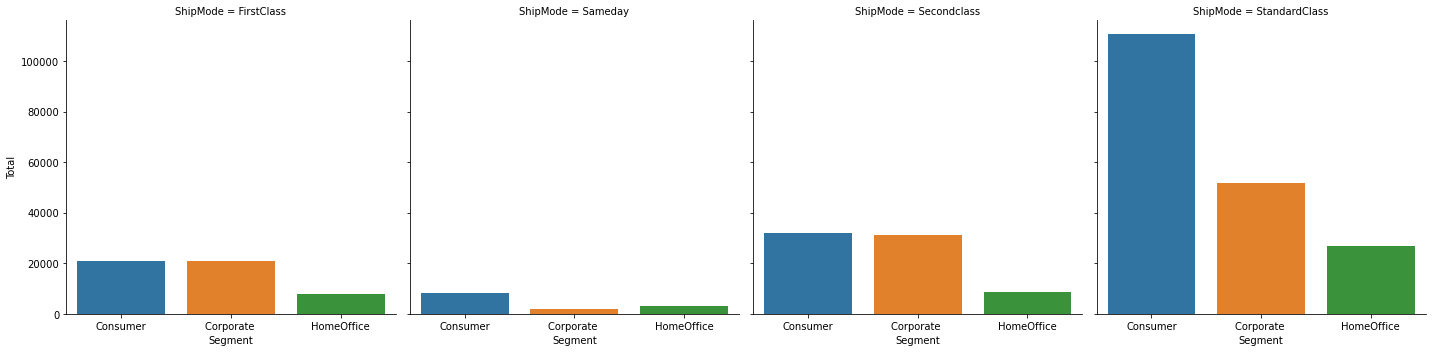

In [34]:
# displays total values for each segment by ShipMode.

sns.catplot(x='Segment',y='Total',data=df[df['isOutlier']==False],
           kind='bar', col='ShipMode',
            estimator= np.sum,ci=None          
           )
plt.show()

The above two charts can be combines and plotted together by using "Horizontal" bar chart.


Each bar represents the specific combination of Segment - ShipMode and


length of the bar indicate the total sales for that combined category.



The below plot shows the total sales for different combinations of customer Segment and ShippingMode.

Longer bars mean higher sales, while shorter bars show lower sales.

The combinations are sorted, with the highest sales at the top.

It looks like "Consumer" with certain shipping modes (ex: StandardClass and SecondClass) likely has the most sales, 

while "Home Office" might have fewer.

This helps identify which groups and shipping methods contribute most to sales!

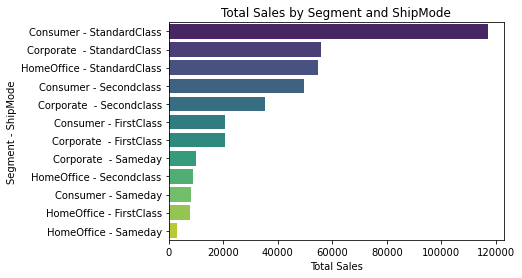

In [36]:
# shows total sales grouped by Segment and ShipMode.

# Combine 'Segment' and 'ShipMode' into a new column
df["Segment_ShipMode"] = df["Segment"] + " - " + df["ShipMode"]

# Group by the new column and calculate total sales
grouped_data = df.groupby("Segment_ShipMode")["Total"].sum().reset_index()
grouped_data = grouped_data.sort_values("Total", ascending=False)

# Create a horizontal bar chart
sns.barplot(data=grouped_data, y="Segment_ShipMode", x="Total", palette="viridis")
plt.title("Total Sales by Segment and ShipMode")
plt.xlabel("Total Sales")
plt.ylabel("Segment - ShipMode")
plt.show()